In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#importing the data set
dataset = (r"C:\Users\Ashutosh\Downloads\adult.data")
df = pd.read_csv(dataset)

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data cleaning

In [6]:
#removing all the leading and trailing spaces and renaming the column names
df.columns = df.columns.str.strip()

In [7]:
df = df.rename(columns={'39': 'age','77516':'final_weight','13':'education_num','White':"race",'Male':'sex',
                        '2174':'capital_gain','0':'capital_loss','40':'hours_per_week','Not-in-family':'Not-in-family',
                        'United-States':'native_country','<=50K':'income'})

In [8]:
df.columns= df.columns.str.lower().str.replace('-','_')
df.columns

Index(['age', 'state_gov', 'final_weight', 'bachelors', 'education_num',
       'never_married', 'adm_clerical', 'not_in_family', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
#similarly converting the data set
cat_columns =df.dtypes[df.dtypes == 'object'].index
for c in cat_columns:
    df[c]=df[c].str.strip()
    df[c] = df[c].str.lower().str.replace('-', '_')

In [10]:
df.head()

,age,state_gov,final_weight,bachelors,education_num,never_married,adm_clerical,not_in_family,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,self_emp_not_inc,83311,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,13,united_states,<=50k
1,38,private,215646,hs_grad,9,divorced,handlers_cleaners,not_in_family,white,male,0,0,40,united_states,<=50k
2,53,private,234721,11th,7,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,<=50k
3,28,private,338409,bachelors,13,married_civ_spouse,prof_specialty,wife,black,female,0,0,40,cuba,<=50k
4,37,private,284582,masters,14,married_civ_spouse,exec_managerial,wife,white,female,0,0,40,united_states,<=50k


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   state_gov       32560 non-null  object
 2   final_weight    32560 non-null  int64 
 3   bachelors       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   never_married   32560 non-null  object
 6   adm_clerical    32560 non-null  object
 7   not_in_family   32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Exploratory Data Analysis

In [12]:
#cheching for unique values
df.nunique()

age                  73
state_gov             9
final_weight      21647
bachelors            16
education_num        16
never_married         7
adm_clerical         15
not_in_family         6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [13]:
#visualyzing the unique values data set 

for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

age
[50 38 53 28 37 49 52 31 42 30]
73

state_gov
['self_emp_not_inc' 'private' 'state_gov' 'federal_gov' 'local_gov' '?'
 'self_emp_inc' 'without_pay' 'never_worked']
9

final_weight
[ 83311 215646 234721 338409 284582 160187 209642  45781 159449 280464]
21647

bachelors
['bachelors' 'hs_grad' '11th' 'masters' '9th' 'some_college' 'assoc_acdm'
 'assoc_voc' '7th_8th' 'doctorate']
16

education_num
[13  9  7 14  5 10 12 11  4 16]
16

never_married
['married_civ_spouse' 'divorced' 'married_spouse_absent' 'never_married'
 'separated' 'married_af_spouse' 'widowed']
7

adm_clerical
['exec_managerial' 'handlers_cleaners' 'prof_specialty' 'other_service'
 'adm_clerical' 'sales' 'craft_repair' 'transport_moving'
 'farming_fishing' 'machine_op_inspct']
15

not_in_family
['husband' 'not_in_family' 'wife' 'own_child' 'unmarried' 'other_relative']
6

race
['white' 'black' 'asian_pac_islander' 'amer_indian_eskimo' 'other']
5

sex
['male' 'female']
2

capital_gain
[    0 14084  5178  5013  2407 1434

In [14]:
#In this data set null values are marked with ? sign 
df = df.applymap(lambda x: np.nan if x=='?' else x)

In [15]:
df.isnull().sum()

age                  0
state_gov         1836
final_weight         0
bachelors            0
education_num        0
never_married        0
adm_clerical      1843
not_in_family        0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [16]:
#since missing value data set is categorical so we will be using mode as our strategy to fill the missing value

cat = ['state_gov','adm_clerical','native_country']
for c in cat:
    df[c].fillna(df[c].mode()[0], inplace=True)

In [17]:
df.isnull().sum()

age               0
state_gov         0
final_weight      0
bachelors         0
education_num     0
never_married     0
adm_clerical      0
not_in_family     0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Analysis of the data


In [18]:
#univariate analysis of  the numerical attributes

In [19]:
df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


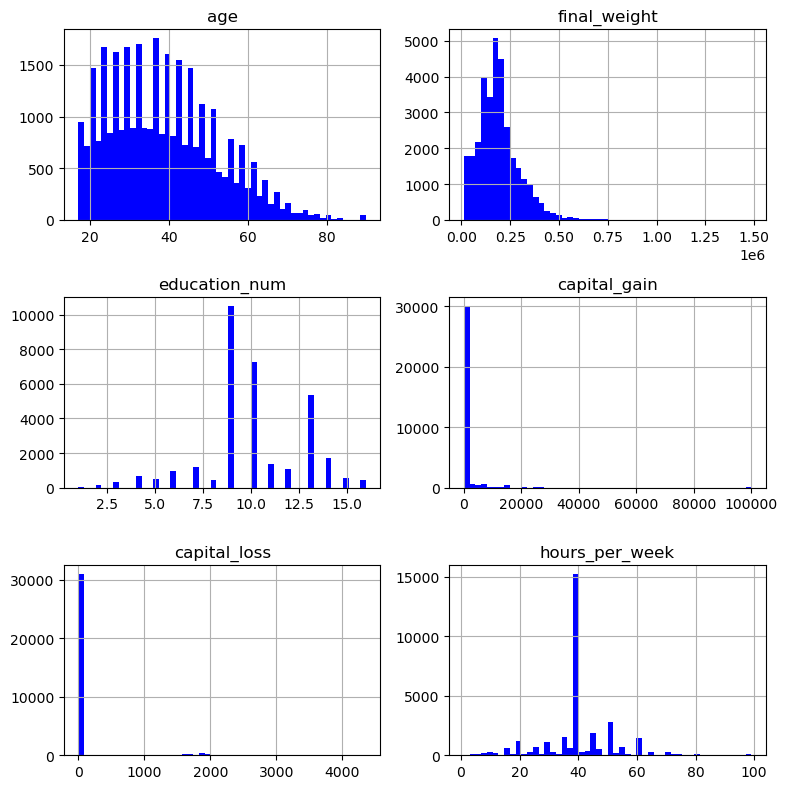

In [20]:
# Visualizing the numerical attributes
layout_val=(-1, 4)
df.hist(bins=50, figsize=(8,8),color='blue')

plt.tight_layout()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

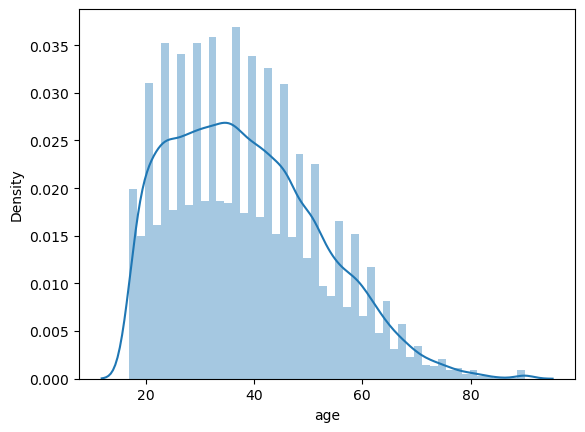

In [21]:
sns.distplot(df.age, bins = 50)

In [22]:
# people whose age above average age and earn less than 50k
avg_age =df[df['age']>38]
print(len(avg_age[avg_age['income']=='<=50k']))

9753


In [23]:
# people whose age above average age  earning more than 50k
print(len(avg_age[avg_age['income']=='>50k']))

5299


In [24]:
#Univariate analysis for Target Variable
df[['income']].value_counts(normalize=True)

income
<=50k     0.759183
>50k      0.240817
dtype: float64

numerical attribute with their income

In [25]:
#checking male and female ratio with their income
df.sex.value_counts(normalize = True)

male      0.669195
female    0.330805
Name: sex, dtype: float64

<AxesSubplot:xlabel='income'>

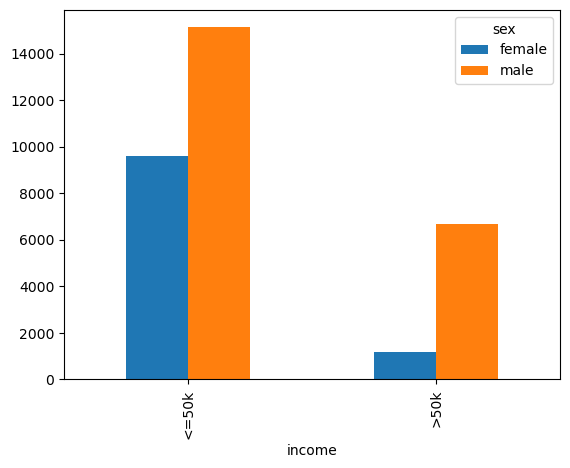

In [26]:
sex = pd.crosstab(df['income'],df['sex'])
sex.plot(kind ='bar')

<AxesSubplot:xlabel='income'>

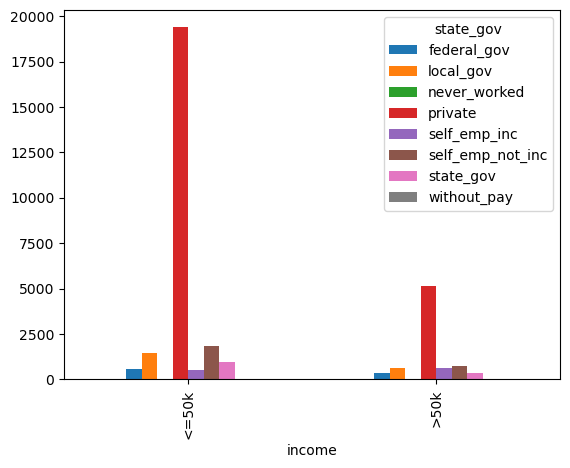

In [27]:
sg = pd.crosstab(df['income'],df['state_gov'])
sg.plot(kind ='bar')

In [28]:
#Since a lot of employs for private sector in state_gov who earn more and less than 50k


#no of private employes getting salary greater than 50k
new_df = df[df['state_gov']=='private']
print(len(new_df[new_df['income']=='<=50k']))

19378


In [29]:
print(len(new_df[new_df['income']=='>50k']))

5154


In [30]:
income_education_num =pd.crosstab(df['income'],df['education_num'])
income_education_num

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income,,,,,,,,,,,,,,,,
<=50k,51,162,317,606,487,871,1115,400,8826,5904,1021,802,3133,764,153,107
>50k,0,6,16,40,27,62,60,33,1675,1387,361,265,2221,959,423,306


<AxesSubplot:xlabel='income'>

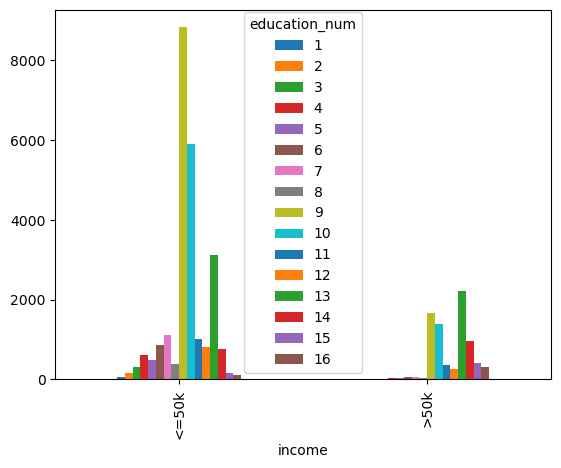

In [31]:
income_education_num.plot(kind ='bar')

In [32]:
income_education =pd.crosstab(df['income'],df['bachelors'])
income_education

bachelors,10th,11th,12th,1st_4th,5th_6th,7th_8th,9th,assoc_acdm,assoc_voc,bachelors,doctorate,hs_grad,masters,preschool,prof_school,some_college
income,,,,,,,,,,,,,,,,
<=50k,871,1115,400,162,317,606,487,802,1021,3133,107,8826,764,51,153,5904
>50k,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


<AxesSubplot:xlabel='income'>

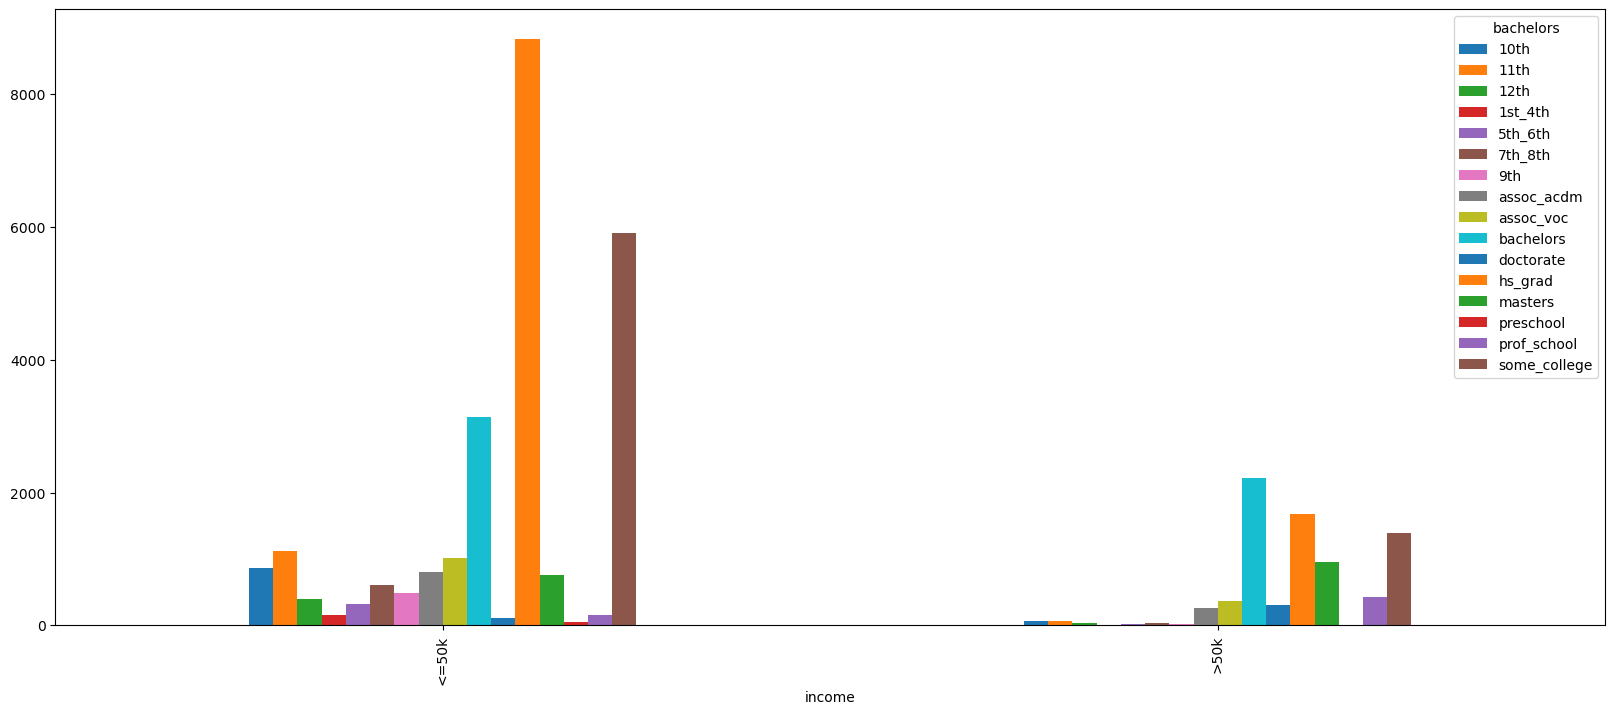

In [33]:
income_education.plot(kind ='bar',figsize = (20,8))

# Feature Engineering
Determining the Number of Outliers

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

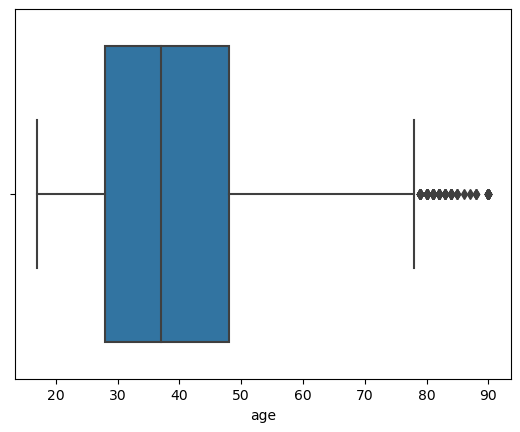

In [34]:
sns.boxplot(df.age)

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

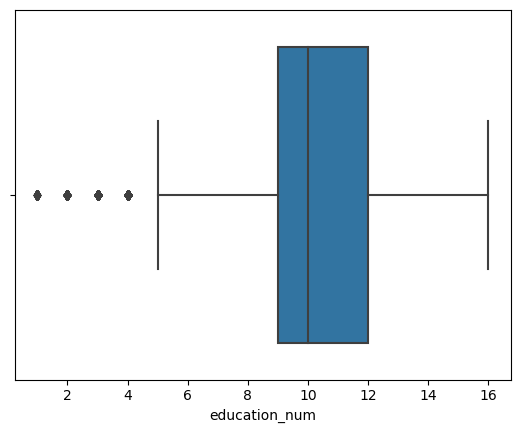

In [35]:
sns.boxplot(df.education_num)

In [36]:
kk=['age','education_num']
df2=df[kk]

upper =df2.quantile(0.70)+1.5 *(df2.quantile(0.70)-df2.quantile(0.20))
lower = df2.quantile(0.20)-1.5 *(df2.quantile(0.70)-df2.quantile(0.20))

for c in kk:
    print(c)   
    x= df2[ (df2[c]<lower[c]) |  (df2[c]>upper[c])][c]
    print('No of Outliers presesnt -> ',len(x))

age
No of Outliers presesnt ->  337
education_num
No of Outliers presesnt ->  2701


In [37]:
#since there are a lot of outliers so we will be removing those outliers

# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.20)
    quartile3 = dataframe[variable].quantile(0.70)
    interquantile_range = quartile3 - quartile1
    upper = quartile3 + 1.5 * interquantile_range
    lower = quartile1 - 1.5 * interquantile_range
    return lower, upper



## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        lower, upper = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < lower), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > upper), variable] = dataframe[variable].mean()

In [38]:
replace_with_thresholds(df,kk)

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

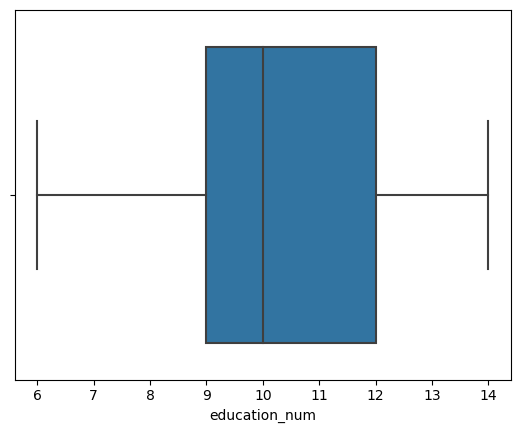

In [39]:
sns.boxplot(df.education_num)

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

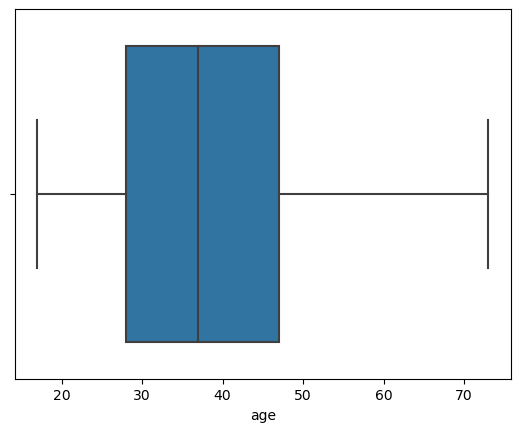

In [40]:
sns.boxplot(df.age)

In [41]:
df.age.mean()

38.16173251309969

# Attributes analysis for categorical variables


In [42]:
#categorical columnns
cat_col=df.select_dtypes(exclude='number').columns.to_list()
cat_col

['state_gov',
 'bachelors',
 'never_married',
 'adm_clerical',
 'not_in_family',
 'race',
 'sex',
 'native_country',
 'income']

<Figure size 640x480 with 0 Axes>

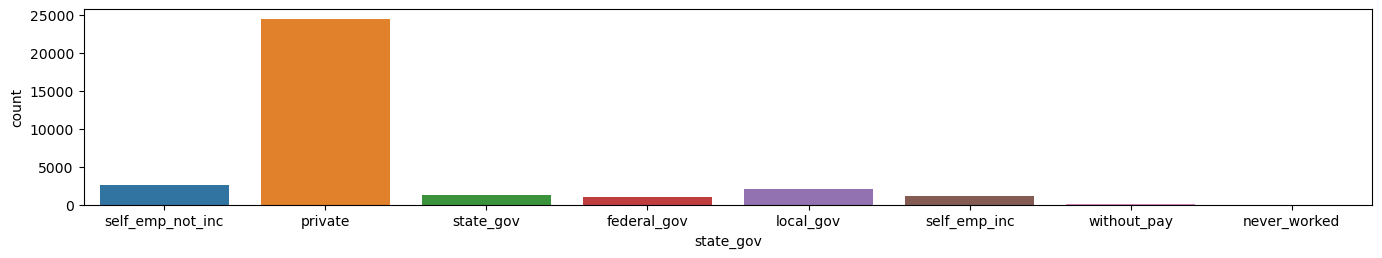

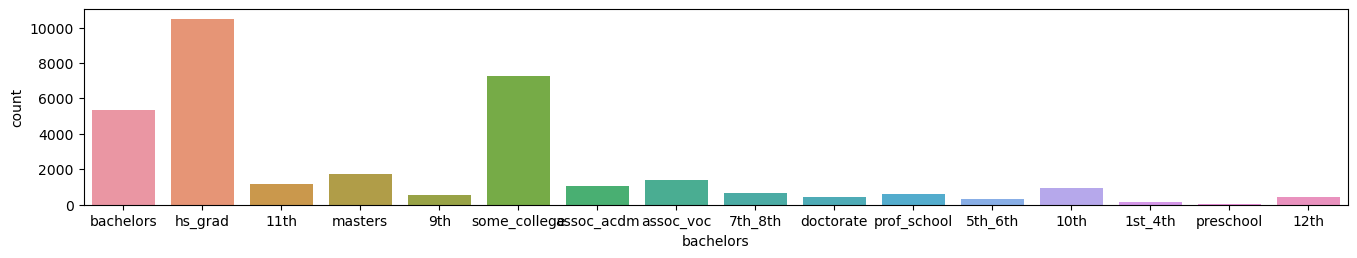

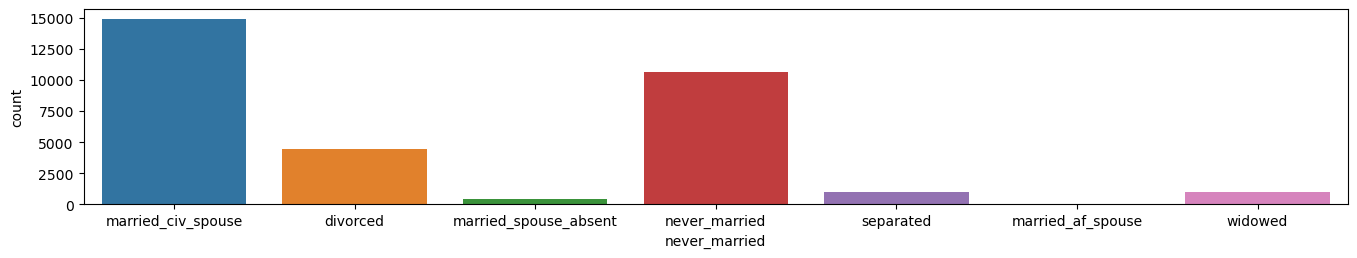

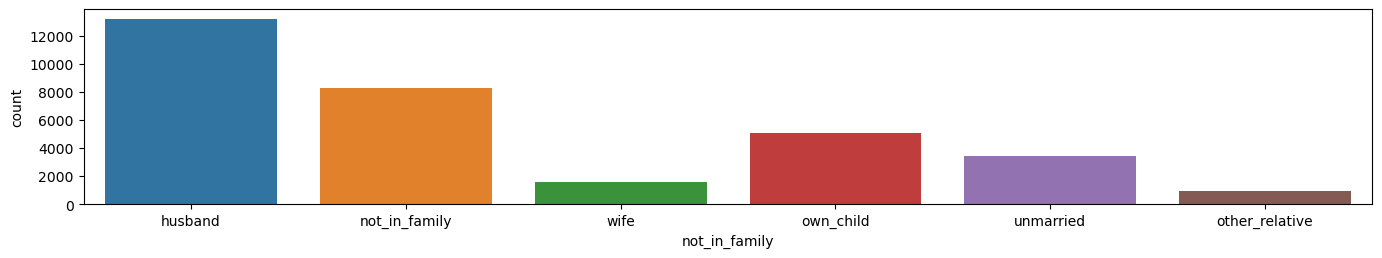

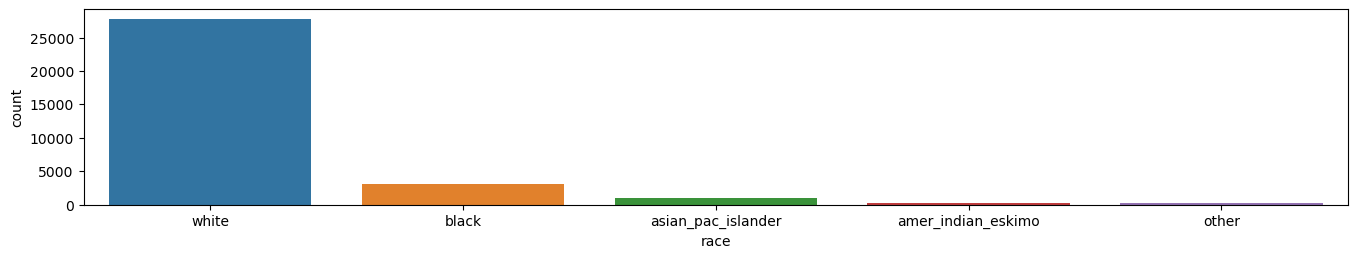

In [43]:
cat_col =['state_gov','bachelors','never_married','not_in_family','race']
plt.suptitle('Univariate Analysis of Categorical Features')
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 20))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.tight_layout()

# feature selection


In [44]:
#Encoding the categorical data set
cat_col=df.select_dtypes(exclude='number').columns.to_list()

In [45]:
from sklearn.preprocessing import LabelEncoder
for c in cat_col:
    label =LabelEncoder()
    df[c]= label.fit_transform(df[c])

In [46]:
df.head()

,age,state_gov,final_weight,bachelors,education_num,never_married,adm_clerical,not_in_family,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50.0,5,83311,9,13.0,2,3,0,4,1,0,0,13,38,0
1,38.0,3,215646,11,9.0,0,5,1,4,1,0,0,40,38,0
2,53.0,3,234721,1,7.0,2,5,0,2,1,0,0,40,38,0
3,28.0,3,338409,9,13.0,2,9,5,2,0,0,0,40,4,0
4,37.0,3,284582,12,14.0,2,3,5,4,0,0,0,40,38,0


In [47]:
# checking for categorical attributes correlation matrix with  target variable 

df[cat_col].corrwith(df.income).abs().sort_values()

state_gov         0.002739
native_country    0.023063
adm_clerical      0.034599
race              0.071853
bachelors         0.079311
never_married     0.199295
sex               0.215995
not_in_family     0.250924
income            1.000000
dtype: float64

In [48]:
#performing chi2 test
from sklearn.feature_selection import chi2

In [49]:
df.head()

,age,state_gov,final_weight,bachelors,education_num,never_married,adm_clerical,not_in_family,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50.0,5,83311,9,13.0,2,3,0,4,1,0,0,13,38,0
1,38.0,3,215646,11,9.0,0,5,1,4,1,0,0,40,38,0
2,53.0,3,234721,1,7.0,2,5,0,2,1,0,0,40,38,0
3,28.0,3,338409,9,13.0,2,9,5,2,0,0,0,40,4,0
4,37.0,3,284582,12,14.0,2,3,5,4,0,0,0,40,38,0


In [50]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [51]:
print(x)

        age  state_gov  final_weight  bachelors  education_num  never_married  \
0      50.0          5         83311          9           13.0              2   
1      38.0          3        215646         11            9.0              0   
2      53.0          3        234721          1            7.0              2   
3      28.0          3        338409          9           13.0              2   
4      37.0          3        284582         12           14.0              2   
...     ...        ...           ...        ...            ...            ...   
32555  27.0          3        257302          7           12.0              2   
32556  40.0          3        154374         11            9.0              2   
32557  58.0          3        151910         11            9.0              6   
32558  22.0          3        201490         11            9.0              4   
32559  52.0          4        287927         11            9.0              2   

       adm_clerical  not_in

<AxesSubplot:>

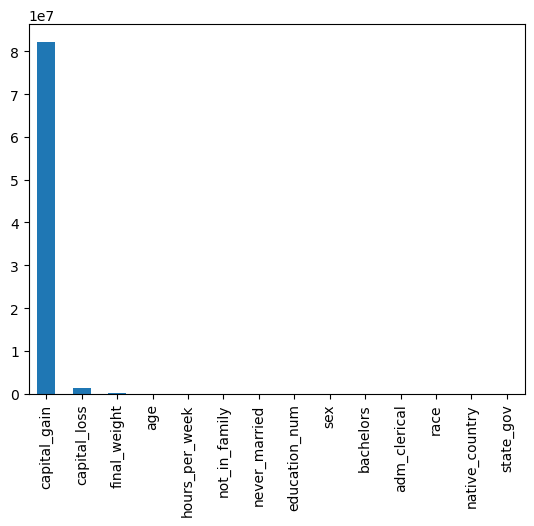

In [52]:
chi_scores = chi2(x,y)
chi_values = pd.Series(chi_scores[0],index = x.columns)
chi_values.sort_values(ascending =False,inplace =True)
chi_values.plot.bar()

#higher the chi value lower the importance

<AxesSubplot:>

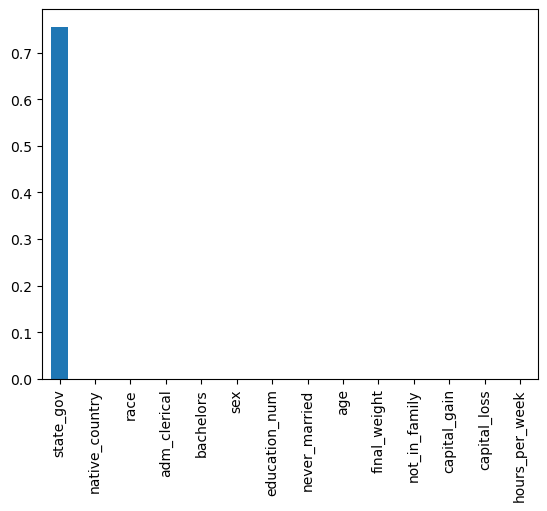

In [53]:
pi_values = pd.Series(chi_scores[1],index = x.columns)
pi_values.sort_values(ascending =False,inplace =True)
pi_values.plot.bar()

In [54]:
# checking for numerical attributes correlation matrix with  target variable 

In [55]:
chi_scores

(array([9.05779508e+03, 9.67275176e-02, 1.71812389e+05, 2.97900431e+02,
        9.22833251e+02, 1.12331938e+03, 1.00199456e+02, 3.65928424e+03,
        3.30379810e+01, 5.02508527e+02, 8.21977263e+07, 1.37204879e+06,
        6.47643538e+03, 1.74412194e+01]),
 array([0.00000000e+000, 7.55792656e-001, 0.00000000e+000, 9.44500194e-067,
        1.06712361e-202, 2.82226857e-246, 1.37797369e-023, 0.00000000e+000,
        9.03760035e-009, 2.70500565e-111, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 2.96329893e-005]))

In [56]:
num=df.select_dtypes(include='number').columns.to_list()
num =df[num].corrwith(df.income)
num

age               0.250945
state_gov         0.002739
final_weight     -0.009481
bachelors         0.079311
education_num     0.284252
never_married    -0.199295
adm_clerical      0.034599
not_in_family    -0.250924
race              0.071853
sex               0.215995
capital_gain      0.223333
capital_loss      0.150523
hours_per_week    0.229690
native_country    0.023063
income            1.000000
dtype: float64

In [57]:
num.abs().sort_values(ascending = False)

income            1.000000
education_num     0.284252
age               0.250945
not_in_family     0.250924
hours_per_week    0.229690
capital_gain      0.223333
sex               0.215995
never_married     0.199295
capital_loss      0.150523
bachelors         0.079311
race              0.071853
adm_clerical      0.034599
native_country    0.023063
final_weight      0.009481
state_gov         0.002739
dtype: float64

from chi2 test and correlation matrix we can see that native_country, state_gov and final weight has least correlation with target variable so we will be remove these variables from our model

In [58]:
df.head()

,age,state_gov,final_weight,bachelors,education_num,never_married,adm_clerical,not_in_family,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50.0,5,83311,9,13.0,2,3,0,4,1,0,0,13,38,0
1,38.0,3,215646,11,9.0,0,5,1,4,1,0,0,40,38,0
2,53.0,3,234721,1,7.0,2,5,0,2,1,0,0,40,38,0
3,28.0,3,338409,9,13.0,2,9,5,2,0,0,0,40,4,0
4,37.0,3,284582,12,14.0,2,3,5,4,0,0,0,40,38,0


In [59]:
df.drop(['state_gov','final_weight','native_country'], axis=1,inplace=True)

In [60]:
df.head()

,age,bachelors,education_num,never_married,adm_clerical,not_in_family,race,sex,capital_gain,capital_loss,hours_per_week,income
0,50.0,9,13.0,2,3,0,4,1,0,0,13,0
1,38.0,11,9.0,0,5,1,4,1,0,0,40,0
2,53.0,1,7.0,2,5,0,2,1,0,0,40,0
3,28.0,9,13.0,2,9,5,2,0,0,0,40,0
4,37.0,12,14.0,2,3,5,4,0,0,0,40,0


splitting the data for training and testing

In [61]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [62]:
print(X)

        age  bachelors  education_num  never_married  adm_clerical  \
0      50.0          9           13.0              2             3   
1      38.0         11            9.0              0             5   
2      53.0          1            7.0              2             5   
3      28.0          9           13.0              2             9   
4      37.0         12           14.0              2             3   
...     ...        ...            ...            ...           ...   
32555  27.0          7           12.0              2            12   
32556  40.0         11            9.0              2             6   
32557  58.0         11            9.0              6             0   
32558  22.0         11            9.0              4             0   
32559  52.0         11            9.0              2             3   

       not_in_family  race  sex  capital_gain  capital_loss  hours_per_week  
0                  0     4    1             0             0              13  
1  

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.2)

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26048, 11)
(26048,)
(6512, 11)
(6512,)


# Model Selection

In [65]:
 from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Ashutosh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [68]:
model.score(X_train,y_train)

0.8189112407862408

In [69]:
#accuracy score
from sklearn.metrics import accuracy_score

In [70]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8117321867321867

In [71]:
#parameter hypertuning
from sklearn.model_selection import RandomizedSearchCV

In [72]:
params = dict(penalty=['l1','l2','elasticnet'],C=[1,0.1,0.01,10,0.5,5])

In [73]:
best_log_model = RandomizedSearchCV(model,params,random_state=5)
best_log_model.fit(X_train,y_train)

C:\Users\Ashutosh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ashutosh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ashutosh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ashutosh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise Valu

RandomizedSearchCV(estimator=LogisticRegression(max_iter=10000),
                   param_distributions={'C': [1, 0.1, 0.01, 10, 0.5, 5],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=5)

In [74]:
best_log_model.best_params_

{'penalty': 'l2', 'C': 0.01}

In [75]:
best_model = LogisticRegression(max_iter =10000,penalty='l2',C = 0.01)
best_model.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=10000)

In [76]:
best_pred = best_model.predict(X_test)
accuracy_score(y_test,best_pred)

0.8109643734643734

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
cm =confusion_matrix(y_test, y_pred)
cm

array([[4654,  268],
       [ 958,  632]], dtype=int64)

0 = '<=50K'

1 ='>50K'

In [79]:
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

4654 268 958 632


In [80]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [81]:
print(precision_score( y_test,y_pred))
print(recall_score( y_test,y_pred))

0.7022222222222222
0.39748427672955977


In [82]:
#precision score represents that out total predicted(tp+fp) positive how many are actually positive(tp)
#recall_score represents that out total actual(tp+fn) positive how many are actually positive(tp)
f1_score(y_test,y_pred)

0.5076305220883535

In [83]:
 from sklearn.model_selection import cross_val_score
cross_val_score(best_model, X_train, y_train, cv=5, scoring="accuracy")

array([0.81919386, 0.81823417, 0.81823417, 0.8187752 , 0.81935112])

In [84]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(best_model, X_test, y_test, cv=3)

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
y_scores = cross_val_predict(best_model, X_train, y_train, cv=5,method="decision_function")


Decision_function method, returns a
score for each instance, and then make predictions based on those scores using threshold

Receiver Operating Characteristic Curve (ROC)

In [86]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

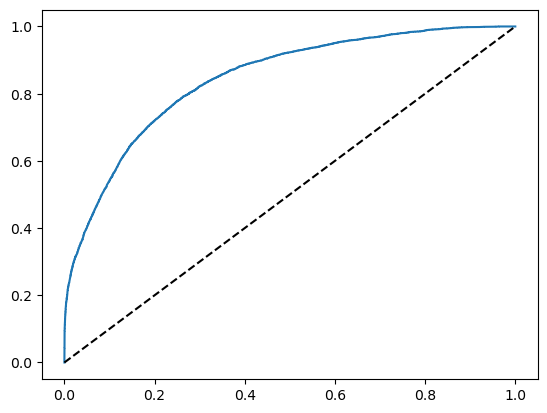

In [87]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.8437119849175903

# RandomForest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

In [90]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
model.score(X_train,y_train)

0.9660242628992629

In [92]:
model_pred = model.predict(X_test)

In [93]:
accuracy_score(y_test,model_pred)


0.8421375921375921

In [94]:
params = dict(criterion=['gini', 'entropy'],max_depth=[1,10,5],min_samples_split=[1,10])

In [95]:
best_ran_model = RandomizedSearchCV(model,params,random_state=7)
best_ran_model.fit(X_train,y_train)

C:\Users\Ashutosh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ashutosh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ashutosh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Ashutosh\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Ashutosh\anaconda3\lib\s

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 5],
                                        'min_samples_split': [1, 10]},
                   random_state=7)

In [96]:
best_ran_model.best_params_

{'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}

In [97]:
best_model = RandomForestClassifier(min_samples_split= 10, max_depth= 10, criterion= 'gini')
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10)

In [98]:
best_model.score(X_train,y_train)

0.8666308353808354

In [99]:
best_pred = best_model.predict(X_test)
accuracy_score(y_test,best_pred)

0.8584152334152334

In [100]:
cm =confusion_matrix(y_test, best_pred)
cm

array([[4702,  220],
       [ 702,  888]], dtype=int64)

In [101]:
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

4702 220 702 888


In [102]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_model, X_train, y_train, cv=5, scoring="accuracy")

array([0.856238  , 0.8571977 , 0.85988484, 0.86081782, 0.86139374])

In [103]:
y_scores = cross_val_predict(best_model, X_train, y_train, cv=5,method="predict_proba")

In [104]:
#predict_proba() method returns an array containing a row per instance and a col‐
#umn per class, each containing the probability that the given instance belongs to the
#given class 

In [105]:
y_scores_rf = y_scores[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_rf)


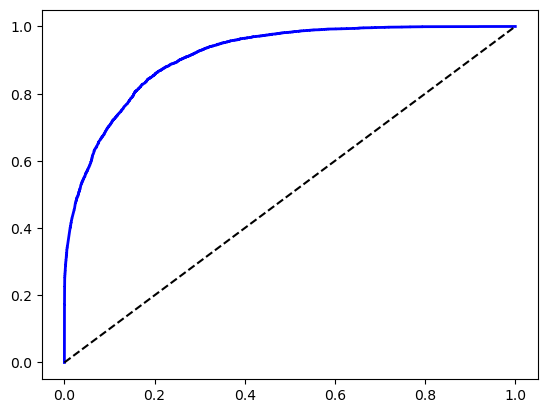

In [106]:
plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label,color ="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


In [107]:
roc_auc_score(y_train, y_scores_rf)

0.9139229302843798

# Model interpretation




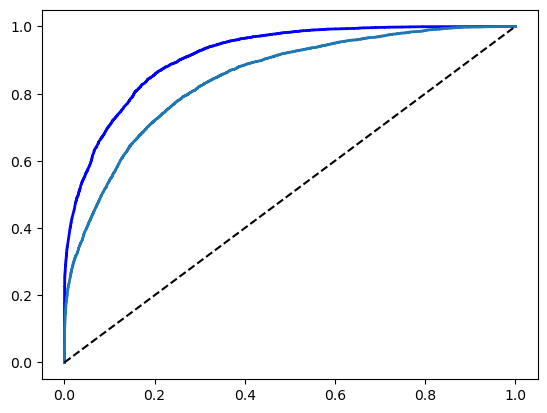

In [108]:
plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label,color ="blue")
plt.plot(fpr, tpr, linewidth=2, label='recall')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


# Summary

Feature engineering

Hyperparameter tuning

Random Forest classifier is better than logistic regression for this dataset as we have far better auc_scores